# Train and compare configurations

In [73]:
from medigraph.train_multiple_models import train_multiple_configurations as train
from medigraph.model.metrics import plot_metrics, analyze_metrics
from medigraph import root_dir
from pathlib import Path
from texttable import Texttable
import latextable
import torch
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
device = "cuda" if torch.cuda.is_available() else "cpu"
n_epochs = 1000
features_selection = ["rfe", "normalized_inputs"]
models_list = ["Dense", "Single-h=16", "GCN-dr=0.1"]
output_folder = root_dir/"results"
assert output_folder.exists(), "Output folder does not exist"

In [75]:
metric_dict = train(
    models_list=models_list,
    device=device,
    n_epochs=n_epochs,
    features_selection_list=features_selection,
    output_folder=output_folder
)

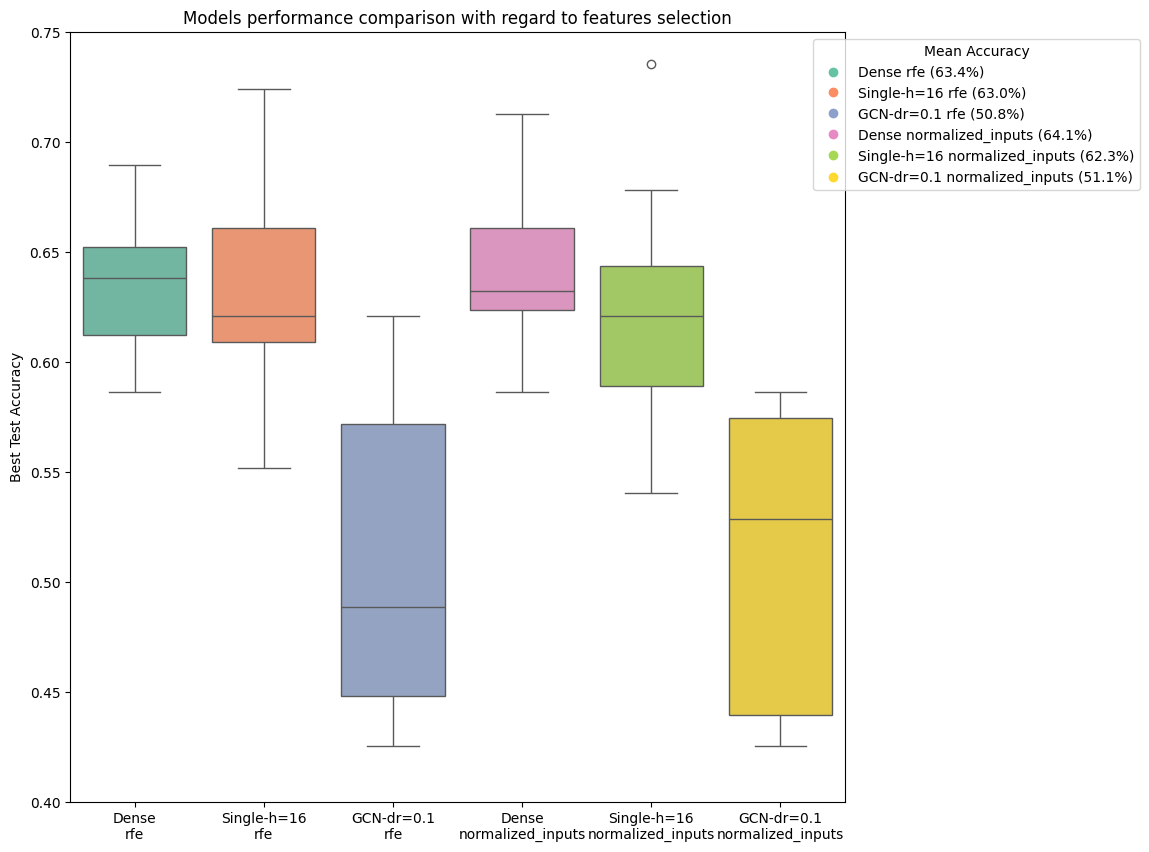

In [80]:
res = analyze_metrics(
    metric_dict,
    plot_flag=True,
    figsize=(10, 10),
    title="Models performance comparison with regard to features selection"
)

# Report metrics as a latex table

In [76]:
res = analyze_metrics(metric_dict, plot_flag=False)

In [77]:

table = Texttable()
table.set_deco(Texttable.HEADER)
header = ["Model", "Feature", "Test accuracy"]
table_content = []
for model_key, model in res.items():
    model_name = model_key.split(" ")[0]
    feature_type = model_key.split(" ")[1].replace("_", " ")
    table_content.append([
        model_name,
        feature_type,
        f"{100.*model['mean_test_accuracy']:.1f} +/- {100*model['std_test_accuracy']:.1f}\%"
    ])
table.add_rows([
    header,
    *table_content
])
print(table.draw())
print(latextable.draw_latex(table, caption="Impact of feature reduction", label="table:input_features_reduction"))

   Model           Feature        Test accuracy 
Dense         rfe                 63.4 +/- 3.3\%
Single-h=16   rfe                 63.0 +/- 5.1\%
GCN-dr=0.1    rfe                 50.8 +/- 6.6\%
Dense         normalized inputs   64.1 +/- 3.4\%
Single-h=16   normalized inputs   62.3 +/- 5.4\%
GCN-dr=0.1    normalized inputs   51.1 +/- 6.5\%
\begin{table}
	\begin{center}
		\begin{tabular}{lll}
			Model & Feature & Test accuracy \\
			\hline
			Dense & rfe & 63.4 +/- 3.3\% \\
			Single-h=16 & rfe & 63.0 +/- 5.1\% \\
			GCN-dr=0.1 & rfe & 50.8 +/- 6.6\% \\
			Dense & normalized inputs & 64.1 +/- 3.4\% \\
			Single-h=16 & normalized inputs & 62.3 +/- 5.4\% \\
			GCN-dr=0.1 & normalized inputs & 51.1 +/- 6.5\% \\
		\end{tabular}
	\end{center}
	\caption{Impact of feature reduction}
	\label{table:input_features_reduction}
\end{table}


In [ ]:
# table = Texttable()
# table.set_deco(Texttable.HEADER)
# table.add_rows([
#     ["Model"] + [v.split(" ")[0] for v in list(res.keys())],
#     ["Feature"] + [v.split(" ")[1].replace("_", " ") for v in list(res.keys())],
#     ["Accuracy"] + [f"{100.*v['mean_test_accuracy']:.1f} +/- {100*v['std_test_accuracy']:.1f}" for v in res.values()],
# ])
# print(table.draw())
# print(latextable.draw_latex(table, caption="Comparison of ", label="table:input_features_reduction"))

# Plot training metrics evolution across epochs

In [ ]:
plot_metrics(metric_dict, figsize=(30, 20))